In [1]:
 # -*- coding: utf-8 -*-
"""
Created on Tue Aug  8 16:27:18 2023

@author: HP
"""

"""
for image processing we will not usde dense layer because for dense layer we have to convert he vector to 1d
by this most of he essential features will be lost

"""

from matplotlib.pyplot import imshow
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import ndimage
import os

from tensorflow.keras.utils import img_to_array#to convert the image to array
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from tensorflow.keras.models import Sequential,Model

np.random.seed(42)

SIZE1,SIZE2=258,194
SIZE1,SIZE2=258,194
SIZE3_1,SIZE3_2=129,97

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:


# Define the input layers for each of the three models
input1 = Input(shape=(SIZE1, SIZE2, 3))
input2 = Input(shape=(SIZE1, SIZE2, 3))
input3 = Input(shape=(SIZE3_1, SIZE3_2, 3))

#for 1st enlarged image


x=Conv2D(64,(3,3),activation='relu',padding='same')(input1)
x=Conv2D(128,(3,3),activation='relu',padding='same')(x)
#x=Conv2D(256,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D((2,2),padding='same')(x)


#for 2nd enlarged image


y=Conv2D(64,(3,3),activation='relu',padding='same')(input2)
y=Conv2D(128,(3,3),activation='relu',padding='same')(y)
#y=Conv2D(256,(3,3),activation='relu',padding='same')(y)
y=MaxPooling2D((2,2),padding='same')(y)



#for the orginal image

z=Conv2D(64,(3,3),activation='relu',padding='same')(input3)
z=Conv2D(128,(3,3),activation='relu',padding='same')(z)
#z=Conv2D(256,(3,3),activation='relu',padding='same')(z)




#concatinate
from keras.layers import concatenate, Flatten, Dense

# Assuming the output shapes are compatible for concatenation
merged = concatenate([x,y,z],axis=3)

#model=Model([input1,input2,input3],merged)
#model.summary()
#tf.keras.utils.plot_model(model,show_shapes=True)


xx=UpSampling2D((2,2))(merged)
xx=Conv2DTranspose(3,(3,3),activation='sigmoid',padding='same')(xx)#3 for RGB
model=Model([input1,input2,input3],xx)
model.summary()


tf.keras.utils.plot_model(model,show_shapes=True)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 258, 194, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_8 (InputLayer)           [(None, 258, 194, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 258, 194, 64  1792        ['input_7[0][0]']                
                                )                                                           

In [5]:



def reduceSize(im):



    width,height = im.shape[:2]

    resized_image = cv2.resize(image, (height // 2, width // 2))

            #print(f'Resized {filename}')

    return resized_image

def bicubic(im):

    scaling_factor = 2

    enlarged_image = ndimage.zoom(im, (scaling_factor, scaling_factor,1), order=3)
    return enlarged_image

def spline(im):

    low_res_image = im

    scaling_factor = 2

    high_res_shape = (low_res_image.shape[0] * scaling_factor, low_res_image.shape[1] * scaling_factor)

    high_res_image = ndimage.zoom(im, (scaling_factor, scaling_factor, 1), order=3)

    return high_res_image


input_directory = 'E:\ML\SuperResolution\Datasets\DB3_B'
all_images_list1 = []
all_images_list2=[]
all_images_list3=[]
orginal_image=[] #y
for filename in os.listdir(input_directory):
        #print(filename)
        path=os.path.join(input_directory, filename)
        image = cv2.imread(path)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        img = cv2.resize(image, (194,258))
        img=img.astype('int')/255.
        print(img.shape)
        orginal_image.append(img)
        #resized_image=img
        resized_image=reduceSize(img)
        bicubic_image=bicubic(resized_image)
        print("Bicubic",bicubic_image.shape)
        spline_image=spline(resized_image)
        print("Spline",spline_image.shape)
        all_images_list1.append(bicubic_image)
        all_images_list2.append(spline_image)
        all_images_list3.append(resized_image)
all_images_list1=np.array(all_images_list1)
all_images_list2=np.array(all_images_list2)
all_images_list3=np.array(all_images_list3)
orginal_image=np.array(orginal_image)
print(all_images_list1.shape)
print(all_images_list2.shape)
print(all_images_list3.shape)
print(orginal_image.shape)


(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194, 3)
Spline (258, 194, 3)
(258, 194, 3)
Bicubic (258, 194

In [6]:
x=model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 258, 194, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_8 (InputLayer)           [(None, 258, 194, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 258, 194, 64  1792        ['input_7[0][0]']                
                                )                                                           

In [7]:



model.fit([all_images_list1,all_images_list2,all_images_list3],orginal_image,epochs=30,shuffle=True)

Epoch 1/30
1/3 [=========>....................] - ETA: 2:47 - loss: 11.4293 - accuracy: 0.0013

KeyboardInterrupt: 

3/3 [==============================] - 62s 19s/step
(258, 194, 3)


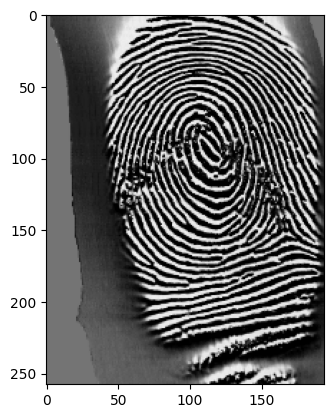

In [ ]:
y_pred=model.predict([all_images_list1,all_images_list2,all_images_list3])
print(y_pred[0].shape)
imshow((y_pred[0]*255).astype(np.uint8))
imshow((orginal_image[0]*255).astype(np.uint8))

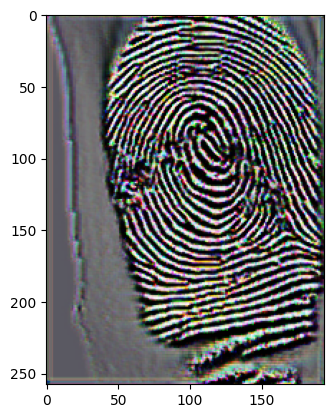

In [ ]:
imshow((y_pred[0]*255).astype(np.uint8))

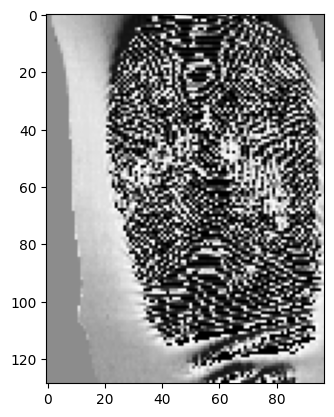

In [ ]:
imshow((all_images_list3[0]*255).astype(np.uint8))

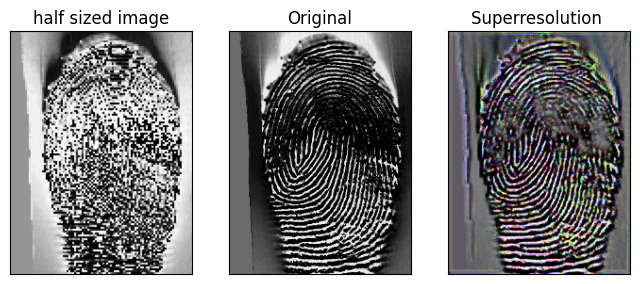

In [ ]:

all_images_list3_1 =all_images_list3* 255
orginal_image_1 = orginal_image*255
y_pred_1 = y_pred*255


fig, ax = plt.subplots(1, 3, figsize=(8, 8))

for i, (p_img, t_img, r_img) in enumerate(zip(all_images_list3_1, orginal_image_1, y_pred_1)):

    #p_img = cv2.resize(p_img, (img_spec_x, img_spec_y))
    ax[0].imshow(p_img.astype(np.uint8), cmap="gray")
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[0].set_title("half sized image")

    #t_img = cv2.resize(t_img, (img_spec_x, img_spec_y))
    ax[1].imshow(t_img.astype(np.uint8), cmap="gray")
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_title("Original")

    #r_img = cv2.resize(r_img, (img_spec_x, img_spec_y))
    ax[2].imshow(r_img.astype(np.uint8))
    ax[2].set_xticks([])
    ax[2].set_yticks([])
    ax[2].set_title("Superresolution ")


    plt.savefig('/content/drive/MyDrive/SuperResolution_'+str(i), dpi=300)


In [ ]:

x=model.add(MaxPooling2D((2,2),padding='same'))





x=model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
x=model.add(UpSampling2D((2,2)))
x=model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
x=model.add(UpSampling2D((2,2)))
x=model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
x=model.add(UpSampling2D((2,2)))
x=model.add(Conv2D(3,(3,3),activation='relu',padding='same'))

x=model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.summary()

#model.fit(x,x,epochs=5,shuffle=True) for the encoder
model.fit(img_array,img_array,epochs=100,shuffle=True)

pred=model.predict(img_array)
imshow(pred[0].reshape(SIZE,SIZE,3))